# PART 1

In [24]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [39]:
#Loading the Labeled Faces in the Wild dataset
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)

In [40]:
# Storing the number of images, height and width of each image
n_samples, h, w = lfw_people.images.shape

In [41]:
# Extracting the number of features in the LFW data set
X = lfw_people.data
n_features = X.shape[1]

In [42]:
# Finding the number of classes in the LFW data set
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

In [6]:
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [10]:
# Splitting the data set into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [11]:
X_train.shape

(966, 1850)

In [12]:
# Determining the number of Principal Components
n_components = 150

In [13]:
# Centering the data set
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean

In [14]:
# Applying Singular Value Decomposition to extract the eigen vectors and eigen faces
U,S,V = np.linalg.svd(X_train, full_matrices = False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))

In [15]:
components.shape

(150, 1850)

In [16]:
eigenfaces.shape

(150, 50, 37)

In [17]:
# Projecting into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)

(966, 150)
(322, 150)


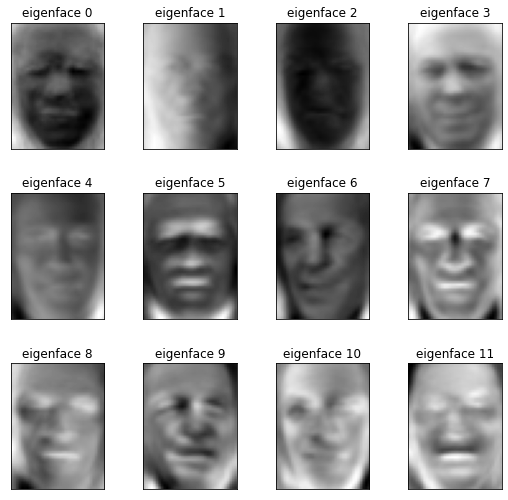

In [18]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row =3, n_col = 4):
    plt.figure(figsize=(1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = 0.99, top = 0.90, hspace = 0.35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap = plt.cm.gray)
        plt.title(titles[i], size =12)
        plt.xticks(())
        plt.yticks(())
        
eigenface_titles = ["eigenface %d" %i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()

(966,)


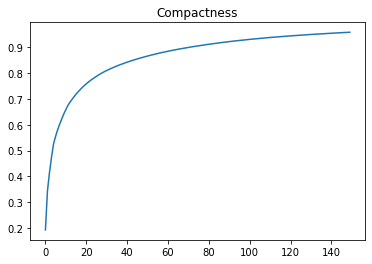

In [16]:
# Evaluating the increase in compactness by adding Principal Components 
explained_variance = (S**2)/(n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance/total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [20]:
#Building the RandomForestClassifier and creating the model with transformed training data in PCA subspace
estimator = RandomForestClassifier(n_estimators = 150, max_depth = 15, max_features = 150,random_state = 42)
estimator.fit(X_transformed, y_train)

RandomForestClassifier(max_depth=15, max_features=150, n_estimators=150,
                       random_state=42)

In [21]:
#Estimating the number of correct predictions
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)

In [35]:
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:", correct)
print("Total Correct:", np.sum(correct))
print("Accuracy:", np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names = target_names,zero_division=False))

Total Testing 322
Predictions [3 3 1 3 3 3 3 1 3 3 3 6 3 3 3 3 6 3 3 4 1 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 3 2 1 3 4 3 1 1 3 6 2 4 1 4 1 2 4 6 3 3
 3 3 3 3 1 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 1 3 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 6 3 3 1 3 1 3 3 1 3 3 1 3
 3 1 4 3 1 3 3 3 3 3 3 3 6 4 5 1 3 3 5 1 3 3 1 3 3 1 5 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 2 4 3 3 3 6 3 3 3 3 6 3 3 3 3 3 3 4 2 4 3 3 5 6 3 3 6 3 2 3 3 6 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 4 3 3 3 3 3 3 1 4 4 3 3 4 3 6 3 1 3
 3 3 3 3 1 3 5 6 1 3 1 1 1 3 3 6 3 3 3 3 3 1 1 3 3 3 2 3 3 3 4 3 3 4 3 3 3
 3 6 3 3 3 6 3 2 1 3 3 3 1 3 3 3 3 3 3 3 4 3 3 3 4 3]
Which Correct: [ True  True False  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

In [23]:
#Implementing tensorflow on LFW data set
import tensorflow as tf

In [24]:
# Function for centering the train and the test data set
def normalize(data):
 # creates a copy of data
 X = tf.identity(data)
 # calculates the mean
 X -=tf.reduce_mean(data, axis=0)
 return X

In [25]:
# Centering the train and the test data set of LFW
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
normalised_data = normalize(X_train)
normalised_data_test = normalize(X_test)

In [26]:
# Implementing singular value decomposition on centered train and test LFW data sets using tensorflow
s_train, u_train, v_train = tf.linalg.svd(normalised_data,full_matrices=False)
s_test, u_test, v_test = tf.linalg.svd(normalised_data_test,full_matrices=False)

In [27]:
# Right singular vector in tensorflow needs to be applied tf.linalg.adjoint to extract the top 150 principal components
v_train_adj = tf.linalg.adjoint(v_train)
components_train = v_train_adj[:n_components]

In [28]:
components_train

<tf.Tensor: shape=(150, 1850), dtype=float32, numpy=
array([[-0.006852  , -0.00752697, -0.00918911, ..., -0.01433783,
        -0.01294186, -0.01188289],
       [-0.02304092, -0.02155203, -0.02275387, ...,  0.04400199,
         0.04318583,  0.04226134],
       [ 0.02187858,  0.02016287,  0.0190092 , ...,  0.05723412,
         0.05080717,  0.04725159],
       ...,
       [-0.03703095, -0.00136078,  0.02081376, ...,  0.00061742,
        -0.00240145,  0.03854419],
       [-0.03179665, -0.0006808 , -0.01316759, ..., -0.02694041,
         0.02580482,  0.03387177],
       [ 0.08361618,  0.01796008, -0.0410669 , ...,  0.00551659,
         0.02022156,  0.04489338]], dtype=float32)>

In [29]:
eigenfaces_train = tf.reshape(components_train,[n_components, h, w])

In [30]:
eigenfaces_train

<tf.Tensor: shape=(150, 50, 37), dtype=float32, numpy=
array([[[-6.85200375e-03, -7.52696954e-03, -9.18911025e-03, ...,
         -9.92533565e-03, -9.24126059e-03, -9.55196470e-03],
        [-7.26930378e-03, -8.41510016e-03, -1.08215315e-02, ...,
         -1.03958426e-02, -9.45333857e-03, -1.00373626e-02],
        [-8.28026887e-03, -9.99703724e-03, -1.27919577e-02, ...,
         -1.14764562e-02, -9.97210108e-03, -1.02715036e-02],
        ...,
        [-3.57812480e-03, -3.60918092e-03, -6.00940455e-03, ...,
         -1.60464514e-02, -1.44772762e-02, -1.34908771e-02],
        [-5.23114158e-03, -5.11383079e-03, -6.15796680e-03, ...,
         -1.55621665e-02, -1.35531388e-02, -1.25194630e-02],
        [-6.16340851e-03, -6.20095478e-03, -6.66628638e-03, ...,
         -1.43378349e-02, -1.29418625e-02, -1.18828900e-02]],

       [[-2.30409168e-02, -2.15520319e-02, -2.27538720e-02, ...,
          2.10219976e-02,  2.16403380e-02,  2.12834291e-02],
        [-2.27004066e-02, -2.19772682e-02, -2.45

In [31]:
# Transforming the centered train and test data into PCA subspace by applying dot product on centered data and the transpose
# of the components vector
X_transformed_train = tf.tensordot(normalised_data, tf.transpose(components_train),axes=1)
print(X_transformed_train)
X_transformed_test = tf.tensordot(normalised_data_test, tf.transpose(components_train),axes=1)
print(X_transformed_test)

tf.Tensor(
[[-1469.7526      654.59766     911.344     ...   -19.692734
     22.254723     16.353731 ]
 [  935.4897     -371.0768      228.87317   ...   -26.191093
     -5.507082    -15.722911 ]
 [ -539.0067       12.349785   -102.795074  ...    -2.5377235
    -17.197895     29.283154 ]
 ...
 [ -538.3846      -25.199577    -91.03092   ...    49.375114
    -16.297512     28.706697 ]
 [ -189.36317    -524.9344      -95.20617   ...    18.959377
    -13.297473      6.489111 ]
 [ -934.39404     705.23834      66.914734  ...    32.692486
    -62.441723      6.2196293]], shape=(966, 150), dtype=float32)
tf.Tensor(
[[-1.0354781e+03  1.1379147e+03 -4.0217502e+02 ...  4.8450017e+00
   5.5012074e+01  4.9851704e+01]
 [-6.4147546e+02 -9.6830194e+02 -2.9828156e+02 ...  1.2668965e+01
  -2.5748065e+00  1.3194458e+01]
 [-6.7761829e+02  1.6603625e+02 -5.3185449e+02 ... -3.3344936e-01
  -1.9379036e+01 -4.9628403e+01]
 ...
 [ 4.7192913e+01  4.3195795e+02  3.5369626e+02 ...  5.5225868e+01
   4.3923020e+00 

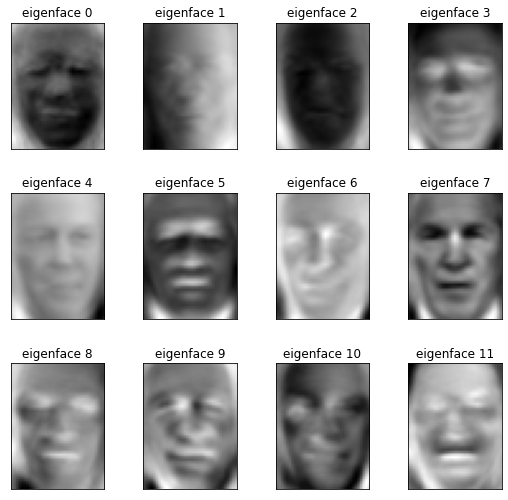

In [32]:
plot_gallery(eigenfaces_train.numpy(),eigenface_titles,h,w)
plt.show()

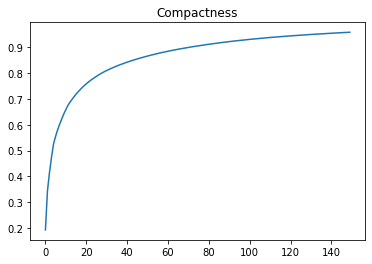

In [34]:
# Evaluating the compactness of the components
exp_var_train = tf.math.square(s_train)/(n_samples-1)
tot_var_train = tf.reduce_sum(exp_var_train).numpy()
exp_var_ratio_train = exp_var_train/tot_var_train
ratio_cumsum_train = tf.cumsum(exp_var_ratio_train)
eig_val_cnt_train = tf.range(n_components)
plt.plot(eig_val_cnt_train.numpy(),ratio_cumsum_train[:n_components].numpy())
plt.title('Compactness')
plt.show()

In [37]:
# Estimating the number of correct predictions using RandomForestClassifier
estimator.fit(X_transformed_train.numpy(),y_train)
predictions_tf = estimator.predict(X_transformed_test.numpy())
correct_tf = predictions_tf==y_test
total_test_tf = len(X_transformed_test)

In [38]:
print("Total Testing", total_test_tf)
print("Predictions", predictions_tf)
print("Which Correct:", correct_tf)
print("Total Correct:", np.sum(correct_tf))
print("Accuracy:", np.sum(correct_tf)/total_test_tf)
print(classification_report(y_test, predictions_tf, target_names = target_names))

Total Testing 322
Predictions [3 3 1 3 3 3 3 1 3 3 3 6 3 3 3 3 6 3 3 4 1 1 3 3 1 3 4 3 3 3 1 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 4 3 3 3 3 3 3 2 1 3 4 3 1 1 3 6 2 4 1 4 1 2 4 6 3 3
 3 3 3 1 3 3 6 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 6 3 3 3 3 3 3 3 3 3 1 3
 3 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 1 3 1 3 3 1 3 3 1 3
 3 1 4 3 3 3 3 3 6 3 3 3 6 5 5 1 3 3 5 1 3 3 3 3 3 1 5 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 2 4 3 3 3 6 3 3 3 3 6 3 2 3 2 3 3 6 2 4 2 3 5 6 3 3 6 3 2 3 3 6 3
 3 1 1 3 3 3 1 3 3 3 3 0 3 1 3 3 3 3 3 1 3 3 3 3 3 3 1 4 4 3 3 4 3 4 3 1 3
 3 3 3 3 1 3 4 6 1 3 1 1 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 4 3 4 3 3 5 3 3 3
 3 6 3 3 3 6 3 2 1 3 3 3 1 3 3 3 3 3 3 3 4 3 3 3 4 3]
Which Correct: [ True  True False  True  True  True False  True  True  True  True False
  True False  True  True False  True  True  True  True False  True False
 False False False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

# PART 2 - CNNs

In [51]:
# Splitting the LFW data set into test and train 
xlfw_train, xlfw_test, ylfw_train, ylfw_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [52]:
# Segregating the training set into training and validation data set, normalising and reshaping them
xlfw_train, xlfw_val = xlfw_train[:500]/255.0, xlfw_train[500:]/255.0
ylfw_train, ylfw_val = ylfw_train[:500], ylfw_train[500:]
xlfw_test = xlfw_test/255.0
xlfw_train = xlfw_train.reshape(500,50,37,1)
xlfw_val = xlfw_val.reshape(466,50,37,1)
xlfw_test = xlfw_test.reshape(322,50,37,1)

In [53]:
# Loading the necessary Keras packages
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical

In [54]:
# Converting the target variables into class matrix
ylfw_train = to_categorical(ylfw_train)
ylfw_test = to_categorical(ylfw_test)
ylfw_val = to_categorical(ylfw_val)

In [55]:
# Dense Only Layer
model_dense = Sequential()
model_dense.add(Flatten())
model_dense.add(Dense(128,activation = 'relu'))
model_dense.add(Dense(64,activation = 'relu'))
model_dense.add(Dense(32,activation = 'relu'))
model_dense.add(Dense(16,activation = 'relu'))
model_dense.add(Dense(7,activation = 'softmax'))

In [56]:
model_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
history_dense = model_dense.fit(xlfw_train, ylfw_train, validation_data=(xlfw_val, ylfw_val),batch_size = 64, epochs=100)

Train on 500 samples, validate on 466 samples
Epoch 1/100
500/500 [==============================] - 0s 313us/step - loss: 1.7933 - accuracy: 0.3560 - val_loss: 1.7291 - val_accuracy: 0.3991
Epoch 2/100
500/500 [==============================] - 0s 82us/step - loss: 1.7204 - accuracy: 0.3960 - val_loss: 1.6606 - val_accuracy: 0.3991
Epoch 3/100
500/500 [==============================] - 0s 70us/step - loss: 1.6818 - accuracy: 0.3960 - val_loss: 1.6803 - val_accuracy: 0.4056
Epoch 4/100
500/500 [==============================] - 0s 68us/step - loss: 1.6420 - accuracy: 0.3980 - val_loss: 1.6100 - val_accuracy: 0.4034
Epoch 5/100
500/500 [==============================] - 0s 68us/step - loss: 1.6144 - accuracy: 0.4040 - val_loss: 1.6034 - val_accuracy: 0.4249
Epoch 6/100
500/500 [==============================] - 0s 78us/step - loss: 1.6064 - accuracy: 0.4300 - val_loss: 1.6050 - val_accuracy: 0.4506
Epoch 7/100
500/500 [==============================] - 0s 70us/step - loss: 1.6066 - accu

In [59]:
ylfw_pred_dense = model_dense.predict_classes(xlfw_test)
ylfw_test_dense = np.argmax(ylfw_test,axis=1)
print(classification_report(ylfw_test_dense, ylfw_pred_dense))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57        13
           1       0.85      0.77      0.81        60
           2       0.74      0.93      0.82        27
           3       0.89      0.82      0.85       146
           4       0.73      0.64      0.68        25
           5       0.92      0.73      0.81        15
           6       0.56      0.78      0.65        36

    accuracy                           0.79       322
   macro avg       0.74      0.75      0.74       322
weighted avg       0.81      0.79      0.79       322



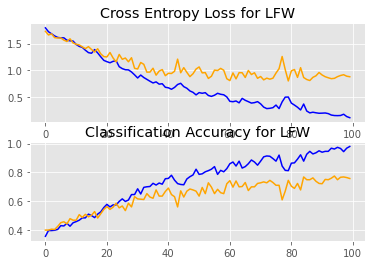

In [60]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss for LFW')
plt.plot(history_dense.history['loss'], color='blue', label='train')
plt.plot(history_dense.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for LFW')
plt.plot(history_dense.history['accuracy'], color='blue', label='train')
plt.plot(history_dense.history['val_accuracy'], color='orange', label='test')

In [43]:
#Initialising the Sequential model for Convolutional Layers
model_lfw = Sequential()

In [44]:
# Adding layers to the model
model_lfw.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(50,37,1)))
model_lfw.add(Conv2D(32, kernel_size=3, activation='relu'))
model_lfw.add(Flatten())
model_lfw.add(Dense(7, activation='softmax'))

In [45]:
model_lfw.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history_lfw = model_lfw.fit(xlfw_train, ylfw_train, validation_data=(xlfw_val, ylfw_val),batch_size = 64, epochs=100)

Train on 500 samples, validate on 466 samples
Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: 1.8520 - accuracy: 0.3500 - val_loss: 1.7842 - val_accuracy: 0.3991
Epoch 2/100
500/500 [==============================] - 0s 128us/step - loss: 1.7466 - accuracy: 0.3960 - val_loss: 1.6559 - val_accuracy: 0.3991
Epoch 3/100
500/500 [==============================] - 0s 124us/step - loss: 1.6521 - accuracy: 0.3960 - val_loss: 1.6077 - val_accuracy: 0.3991
Epoch 4/100
500/500 [==============================] - 0s 128us/step - loss: 1.5411 - accuracy: 0.4180 - val_loss: 1.5283 - val_accuracy: 0.4442
Epoch 5/100
500/500 [==============================] - 0s 124us/step - loss: 1.2995 - accuracy: 0.5340 - val_loss: 1.3271 - val_accuracy: 0.5515
Epoch 6/100
500/500 [==============================] - 0s 120us/step - loss: 1.0770 - accuracy: 0.6480 - val_loss: 1.2487 - val_accuracy: 0.5558
Epoch 7/100
500/500 [==============================] - 0s 122us/step - loss: 0.8257 - 

In [47]:
# Classification Report
ylfw_pred = model_lfw.predict_classes(xlfw_test)
ylfw_test = np.argmax(ylfw_test,axis=1)
print(classification_report(ylfw_test, ylfw_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.81      0.78      0.80        60
           2       0.64      0.67      0.65        27
           3       0.82      0.92      0.87       146
           4       0.70      0.56      0.62        25
           5       0.86      0.40      0.55        15
           6       0.71      0.69      0.70        36

    accuracy                           0.78       322
   macro avg       0.73      0.64      0.67       322
weighted avg       0.77      0.78      0.77       322



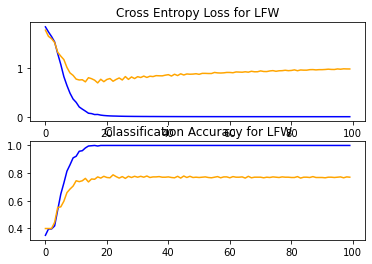

In [48]:
# Plotting Cross Entropy Loss and Classification Accuracy for training and test LFW data
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss for LFW')
plt.plot(history_lfw.history['loss'], color='blue', label='train')
plt.plot(history_lfw.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy for LFW')
plt.plot(history_lfw.history['accuracy'], color='blue', label='train')
plt.plot(history_lfw.history['val_accuracy'], color='orange', label='test')

In [73]:
#Loading the CIFAR10 data set from keras.datasets
from keras.datasets import cifar10
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

In [74]:
train_X.shape, test_X.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [75]:
#Implementing one-hot encoding on Training and test data target variables
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [76]:
# Splitting the training data into validation and training data
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
val_X,train_X = train_X[:9000]/255.0, train_X[9000:]/255.0
val_y,train_y = train_y[:9000], train_y[9000:]
test_X = test_X/255.0

In [82]:
# Building model with convolutional, maxpooling, and dense layers
model_cifar = Sequential()
model_cifar.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=(32, 32, 3)))
model_cifar.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_cifar.add(MaxPooling2D((2, 2)))
model_cifar.add(Dropout(0.2))
model_cifar.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cifar.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cifar.add(MaxPooling2D((2, 2)))
model_cifar.add(Dropout(0.2))
model_cifar.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cifar.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cifar.add(MaxPooling2D((2, 2)))
model_cifar.add(Dropout(0.2))
model_cifar.add(Flatten())
model_cifar.add(Dense(64, activation='relu'))
model_cifar.add(Dropout(0.2))
model_cifar.add(Dense(10, activation='softmax'))

In [83]:
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [84]:
hist_train = model_cifar.fit(train_X, train_y, batch_size=64,validation_data=(val_X, val_y), epochs=50)

Train on 41000 samples, validate on 9000 samples
Epoch 1/50
41000/41000 [==============================] - 5s 133us/step - loss: 1.7577 - accuracy: 0.3458 - val_loss: 1.4002 - val_accuracy: 0.4870
Epoch 2/50
41000/41000 [==============================] - 5s 126us/step - loss: 1.3032 - accuracy: 0.5280 - val_loss: 1.0744 - val_accuracy: 0.6122
Epoch 3/50
41000/41000 [==============================] - 5s 126us/step - loss: 1.1026 - accuracy: 0.6091 - val_loss: 1.0279 - val_accuracy: 0.6348
Epoch 4/50
41000/41000 [==============================] - 5s 127us/step - loss: 0.9848 - accuracy: 0.6531 - val_loss: 0.8794 - val_accuracy: 0.6799
Epoch 5/50
41000/41000 [==============================] - 5s 127us/step - loss: 0.8988 - accuracy: 0.6846 - val_loss: 0.8164 - val_accuracy: 0.7079
Epoch 6/50
41000/41000 [==============================] - 5s 127us/step - loss: 0.8352 - accuracy: 0.7073 - val_loss: 0.7825 - val_accuracy: 0.7233
Epoch 7/50
41000/41000 [==============================] - 5s 12

In [85]:
# Classification Report
cifar_pred = model_cifar.predict_classes(test_X)
test_y = np.argmax(test_y,axis=1)
print(classification_report(test_y, cifar_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1000
           1       0.92      0.89      0.90      1000
           2       0.77      0.71      0.74      1000
           3       0.64      0.64      0.64      1000
           4       0.79      0.77      0.78      1000
           5       0.72      0.72      0.72      1000
           6       0.82      0.87      0.85      1000
           7       0.85      0.82      0.83      1000
           8       0.87      0.90      0.88      1000
           9       0.87      0.88      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.80     10000
weighted avg       0.81      0.81      0.80     10000



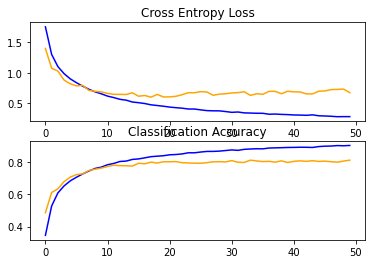

In [86]:
# Plotting Cross Entropy Loss and Classification Accuracy for CIFAR-10
import matplotlib.pyplot as plt
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(hist_train.history['loss'], color='blue', label='train')
plt.plot(hist_train.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(hist_train.history['accuracy'], color='blue', label='train')
plt.plot(hist_train.history['val_accuracy'], color='orange', label='test')

# PART 3 - UNET ON OASIS Dataset

In [10]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

from tqdm import tqdm_notebook, tnrange
from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Model, load_model
from keras.layers import Input, BatchNormalization, Activation, Dense, Dropout
from keras.layers.core import Lambda, RepeatVector, Reshape
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D, GlobalMaxPool2D
from keras.layers.merge import concatenate, add
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical

In [2]:
# Initialising the compression dimensions
img_width = 128
img_height = 128
border = 5

In [3]:
# Extracting the file names of the images and masks in training, test and validation folders 
ids_train = next(os.walk("H:/45586327/keras_png_slices_data/keras_png_slices_train"))[2] 
ids_test = next(os.walk("H:/45586327/keras_png_slices_data/keras_png_slices_test"))[2]
ids_val = next(os.walk("H:/45586327/keras_png_slices_data/keras_png_slices_validate"))[2]
ids_seg_train = next(os.walk("H:/45586327/keras_png_slices_data/keras_png_slices_seg_train"))[2]
ids_seg_test = next(os.walk("H:/45586327/keras_png_slices_data/keras_png_slices_seg_test"))[2]
ids_seg_val = next(os.walk("H:/45586327/keras_png_slices_data/keras_png_slices_seg_validate"))[2]
print("No. of images in training folder= ", len(ids_train))
print("No. of images in test folder= ", len(ids_test))
print("No. of images in validation folder= ", len(ids_val))


No. of images in training folder=  9664
No. of images in test folder=  544
No. of images in validation folder=  1120


In [4]:
# Function for loading images from the folders
def loading_img(inp_path,ids):
    X = np.zeros((len(ids), img_height, img_width, 1), dtype=np.float32)
    for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
        # Load images
        img = load_img(inp_path+id_, color_mode = 'grayscale')
        x_img = img_to_array(img)
        x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
        X[n] = x_img/255
        
    return X

In [5]:
def loading_seg(inp_path,ids):
    X = np.zeros((len(ids), img_height, img_width, 1), dtype=np.uint8)
    for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
        # Load images
        img = load_img(inp_path+id_, color_mode = 'grayscale')
        x_img = img_to_array(img)
        x_img = resize(x_img, (128, 128, 1), mode = 'constant', preserve_range = True)
        X[n] = x_img
        
    return X

In [6]:
# Loading the images and the masks for the training data set
XOasis_train= loading_img("H:/45586327/keras_png_slices_data/keras_png_slices_train/",ids_train)

C:\Users\s4558632\.conda\envs\datta\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [7]:
yOasis_train= loading_seg("H:/45586327/keras_png_slices_data/keras_png_slices_seg_train/",ids_seg_train)   

C:\Users\s4558632\.conda\envs\datta\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Loading the images and the masks for the test data set
XOasis_test= loading_img("H:/45586327/keras_png_slices_data/keras_png_slices_test/",ids_test)
yOasis_test = loading_seg("H:/45586327/keras_png_slices_data/keras_png_slices_seg_test/",ids_seg_test)

C:\Users\s4558632\.conda\envs\datta\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


C:\Users\s4558632\.conda\envs\datta\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Loading the images and the masks for the validation data set
XOasis_val= loading_img("H:/45586327/keras_png_slices_data/keras_png_slices_validate/",ids_val)
yOasis_val = loading_seg("H:/45586327/keras_png_slices_data/keras_png_slices_seg_validate/",ids_seg_val)

C:\Users\s4558632\.conda\envs\datta\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


C:\Users\s4558632\.conda\envs\datta\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
yOasis_train_sc = yOasis_train//85
yOasis_test_sc = yOasis_test//85
yOasis_val_sc = yOasis_val//85

In [12]:
yOasis_train_cat = to_categorical(yOasis_train_sc)
yOasis_test_cat = to_categorical(yOasis_test_sc)
yOasis_val_cat = to_categorical(yOasis_val_sc)

In [13]:
# Function to add 2 convolutional layers with parameters passed to it
def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
    
    # first layer
    layer = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        layer = BatchNormalization()(layer)
    layer = Activation('relu')(layer)
    
    # second layer
    layer = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),
              kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
    if batchnorm:
        layer = BatchNormalization()(layer)
    layer = Activation('relu')(layer)
    
    return layer

In [14]:
# Function for generating the UNET model
def unet_gen(inp_img, n_fil = 16, drop = 0.1, batch = True):
    
    # Contracting Path
    c1 = conv2d_block(inp_img, n_fil * 1, kernel_size = 3, batchnorm = batch)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(drop)(p1)
    
    c2 = conv2d_block(p1, n_fil * 2, kernel_size = 3, batchnorm = batch)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(drop)(p2)
    
    c3 = conv2d_block(p2, n_fil * 4, kernel_size = 3, batchnorm = batch)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(drop)(p3)
    
    c4 = conv2d_block(p3, n_fil * 8, kernel_size = 3, batchnorm = batch)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(drop)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_fil * 16, kernel_size = 3, batchnorm = batch)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_fil * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(drop)(u6)
    c6 = conv2d_block(u6, n_fil * 8, kernel_size = 3, batchnorm = batch)
    
    u7 = Conv2DTranspose(n_fil * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(drop)(u7)
    c7 = conv2d_block(u7, n_fil * 4, kernel_size = 3, batchnorm = batch)
    
    u8 = Conv2DTranspose(n_fil * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(drop)(u8)
    c8 = conv2d_block(u8, n_fil * 2, kernel_size = 3, batchnorm = batch)
    
    u9 = Conv2DTranspose(n_fil * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(drop)(u9)
    c9 = conv2d_block(u9, n_fil * 1, kernel_size = 3, batchnorm = batch)
    
    outputs = Conv2D(4, (1, 1), activation='softmax')(c9)
    model = Model(inputs=[inp_img], outputs=[outputs])
    return model

In [15]:
input_img = Input((img_height, img_width, 1), name='img')
model = unet_gen(input_img, n_fil=16, drop=0.05, batch=True)
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
# Printing the model summary of UNET
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 128, 128, 16) 160         img[0][0]                        
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 128, 128, 16) 64          conv2d_2[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 128, 128, 16) 0           batch_normalization_2[0][0]      
____________________________________________________________________________________________

In [17]:
# Providing conditions for the training to stop based on validation loss
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-OASIS.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [18]:
results = model.fit(XOasis_train, yOasis_train_cat, batch_size=32, epochs=20, callbacks=callbacks,validation_data=(XOasis_val, yOasis_val_cat))

Train on 9664 samples, validate on 1120 samples
Epoch 1/20
9664/9664 [==============================] - 28s 3ms/step - loss: 0.3288 - accuracy: 0.8697 - val_loss: 0.2539 - val_accuracy: 0.8879

Epoch 00001: val_loss improved from inf to 0.25394, saving model to model-OASIS.h5
Epoch 2/20
9664/9664 [==============================] - 22s 2ms/step - loss: 0.2424 - accuracy: 0.8874 - val_loss: 0.2375 - val_accuracy: 0.8880

Epoch 00002: val_loss improved from 0.25394 to 0.23750, saving model to model-OASIS.h5
Epoch 3/20
9664/9664 [==============================] - 22s 2ms/step - loss: 0.2361 - accuracy: 0.8882 - val_loss: 0.2347 - val_accuracy: 0.8889

Epoch 00003: val_loss improved from 0.23750 to 0.23470, saving model to model-OASIS.h5
Epoch 4/20
9664/9664 [==============================] - 22s 2ms/step - loss: 0.2341 - accuracy: 0.8885 - val_loss: 0.2341 - val_accuracy: 0.8883

Epoch 00004: val_loss improved from 0.23470 to 0.23406, saving model to model-OASIS.h5
Epoch 5/20
9664/9664 [==

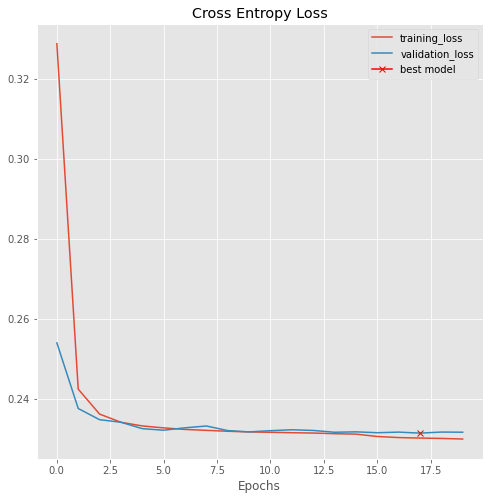

In [19]:
# Plotting the training and validation loss with respect to epochs
plt.figure(figsize=(8, 8))
plt.title("Cross Entropy Loss")
plt.plot(results.history["loss"], label="training_loss")
plt.plot(results.history["val_loss"], label="validation_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.legend();

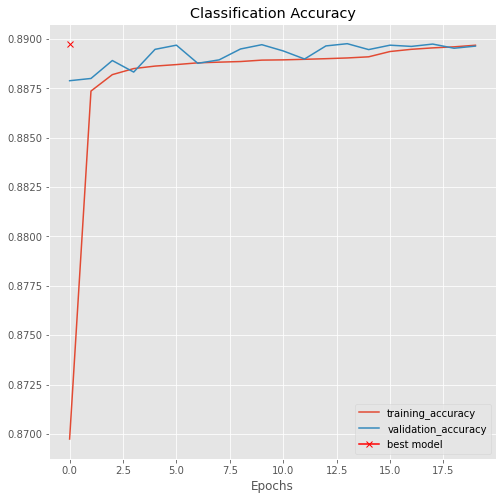

In [20]:
# Plotting the training and validation accuracy with respect to epochs
plt.figure(figsize=(8, 8))
plt.title("Classification Accuracy")
plt.plot(results.history["accuracy"], label="training_accuracy")
plt.plot(results.history["val_accuracy"], label="validation_accuracy")
plt.plot( np.argmin(results.history["val_accuracy"]), np.max(results.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.legend();

In [21]:
# load the best model
model.load_weights('model-OASIS.h5')

In [22]:
test_preds = model.predict(XOasis_test, verbose=1)


544/544 [==============================] - 1s 1ms/step


In [23]:
# Dice Coeffient
from keras import backend as K
def dice_coeff(y_true, y_pred, smooth=1):
    intersect = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersect
    coeff_dice = K.mean((intersect + smooth) / (union + smooth), axis=0)
    return coeff_dice

In [25]:
# Printing Dice Coefficient
dice_coeff(yOasis_test_cat, test_preds, smooth=1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.75071007>

In [26]:
def plot_Oasis(X, y, y_pred, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))
    else:
        ix = ix

    

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='gray')
    ax[0].contour(X[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('Actual Image')

    ax[1].imshow(y[ix,...,0],cmap='gray')
    ax[1].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[1].set_title('Actual Segment Image')

    ax[2].imshow(y_pred[ix,...,0],cmap='gray')
    ax[2].contour(y_pred[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted Segment Image')

In [27]:
test_preds_arg = np.argmax(test_preds, axis = -1)*85

In [28]:
n,h,w,g = yOasis_test.shape

In [29]:
n,h,w,g

(544, 128, 128, 1)

In [30]:
test_preds_reshape = test_preds_arg.reshape(n,h,w,g)

In [31]:
test_preds_reshape.shape

(544, 128, 128, 1)

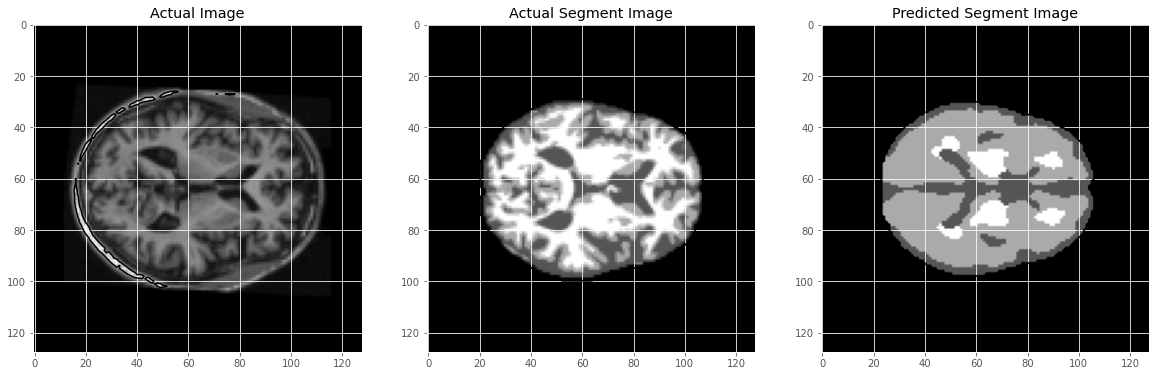

In [71]:
plot_Oasis(XOasis_test,yOasis_test,test_preds_reshape)